# Logistic-Regression-(Assignment) (DATA LIT)

### GitHub repository: https://github.com/guillainbisimwa/Data-lit/blob/master/week5/Logistic-Regression-(Assignment).ipynb

### Owner: GuillainBISIMWA

- GitHub: https://github.com/guillainbisimwa
- Twitter: https://twitter.com/gullain_bisimwa
- YouTube: https://www.youtube.com/guillainbisimwa

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [185]:
%matplotlib inline

## 1. Importing Data

In [186]:
columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']

train_data = pd.read_csv('Data/adult-training.csv', names=columns)
test_data = pd.read_csv('Data/adult-test.csv', names=columns, skiprows=1)

In [187]:
train_data.head()

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 2. Clean data

In [188]:
train_data.replace(' ?', np.nan, inplace=True)
test_data.replace(' ?', np.nan, inplace=True)

In [189]:
train_data.isnull().sum().sort_values(ascending=False)

Occupation        1843
Workclass         1836
Native country     583
Income               0
Hours/Week           0
Capital Loss         0
Capital Gain         0
Sex                  0
Race                 0
Relationship         0
Marital Status       0
Education num        0
Education            0
fnlgwt               0
Age                  0
dtype: int64

### * Fill the NaN values to zero

In [190]:
mode = train_data['Occupation'].mode()[0]
train_data['Occupation'].fillna(value=mode, inplace=True)
mode = test_data['Occupation'].mode()[0]
test_data['Occupation'].fillna(value=mode, inplace=True)

mode = train_data['Workclass'].mode()[0]
train_data['Workclass'].fillna(value=mode, inplace=True)
mode = test_data['Workclass'].mode()[0]
test_data['Workclass'].fillna(value=mode, inplace=True)

mode = train_data['Native country'].mode()[0]
train_data['Native country'].fillna(value=mode, inplace=True)
mode = test_data['Native country'].mode()[0]
test_data['Native country'].fillna(value=mode, inplace=True)

### * Merge some Workclass which has the closer meaning

In [191]:
train_data.replace(' Never-worked', ' Without-pay', inplace=True)
test_data.replace(' Never-worked', ' Without-pay', inplace=True)

### * Duplicate some columns and convert them into integers to better understand them

In [192]:
train_data['_Marital Status'] = train_data['Marital Status']
test_data['_Marital Status'] = test_data['Marital Status']

In [193]:
train_data['_Workclass'] = train_data.Workclass
test_data['_Workclass'] = test_data.Workclass

In [194]:
train_data['_Occupation'] = train_data.Occupation
test_data['_Occupation'] = test_data.Occupation

In [195]:
train_data['_Relationship'] = train_data.Relationship
test_data['_Relationship'] = test_data.Relationship

In [196]:
train_data['_Race'] = train_data.Race
test_data['_Race'] = test_data.Race

In [197]:
train_data['_Sex'] = train_data.Sex
test_data['_Sex'] = test_data.Sex

In [198]:
train_data['_Income'] = train_data.Income
test_data['_Income'] = test_data.Income

### * Convert duplicated columns into integers

In [199]:
train_data._Workclass.value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            21
Name: _Workclass, dtype: int64

In [200]:
train_data._Workclass.replace(' Private', 1, inplace=True)
train_data._Workclass.replace(' Self-emp-not-inc', 2, inplace=True)
train_data._Workclass.replace(' Local-gov', 3, inplace=True)
train_data._Workclass.replace(' State-gov', 4, inplace=True)
train_data._Workclass.replace(' Self-emp-inc', 5, inplace=True)
train_data._Workclass.replace(' Federal-gov', 6, inplace=True)
train_data._Workclass.replace(' Without-pay', 7, inplace=True)

test_data._Workclass.replace(' Private', 1, inplace=True)
test_data._Workclass.replace(' Self-emp-not-inc', 2, inplace=True)
test_data._Workclass.replace(' Local-gov', 3, inplace=True)
test_data._Workclass.replace(' State-gov', 4, inplace=True)
test_data._Workclass.replace(' Self-emp-inc', 5, inplace=True)
test_data._Workclass.replace(' Federal-gov', 6, inplace=True)
test_data._Workclass.replace(' Without-pay', 7, inplace=True)

In [201]:
train_data['_Marital Status'].replace(' Married-civ-spouse', 1, inplace=True)
train_data['_Marital Status'].replace(' Never-married', 2, inplace=True)
train_data['_Marital Status'].replace(' Divorced', 3, inplace=True)
train_data['_Marital Status'].replace(' Separated', 4, inplace=True)
train_data['_Marital Status'].replace(' Widowed', 5, inplace=True)
train_data['_Marital Status'].replace(' Married-spouse-absent', 6, inplace=True)
train_data['_Marital Status'].replace(' Married-AF-spouse', 7, inplace=True)

test_data['_Marital Status'].replace(' Married-civ-spouse', 1, inplace=True)
test_data['_Marital Status'].replace(' Never-married', 2, inplace=True)
test_data['_Marital Status'].replace(' Divorced', 3, inplace=True)
test_data['_Marital Status'].replace(' Separated', 4, inplace=True)
test_data['_Marital Status'].replace(' Widowed', 5, inplace=True)
test_data['_Marital Status'].replace(' Married-spouse-absent', 6, inplace=True)
test_data['_Marital Status'].replace(' Married-AF-spouse', 7, inplace=True)

In [202]:
train_data._Occupation.replace(' Prof-specialty', 1, inplace=True)
train_data._Occupation.replace(' Craft-repair', 2, inplace=True)
train_data._Occupation.replace(' Exec-managerial', 3, inplace=True)
train_data._Occupation.replace(' Adm-clerical', 4, inplace=True)
train_data._Occupation.replace(' Sales', 5, inplace=True)
train_data._Occupation.replace(' Other-service', 6, inplace=True)
train_data._Occupation.replace(' Machine-op-inspct', 7, inplace=True)
train_data._Occupation.replace(' Transport-moving', 8, inplace=True)
train_data._Occupation.replace(' Handlers-cleaners', 9, inplace=True)
train_data._Occupation.replace(' Farming-fishing', 10, inplace=True)
train_data._Occupation.replace(' Tech-support', 11, inplace=True)
train_data._Occupation.replace(' Protective-serv', 12, inplace=True)
train_data._Occupation.replace(' Priv-house-serv', 13, inplace=True)
train_data._Occupation.replace(' Armed-Forces', 14, inplace=True)

test_data._Occupation.replace(' Prof-specialty', 1, inplace=True)
test_data._Occupation.replace(' Craft-repair', 2, inplace=True)
test_data._Occupation.replace(' Exec-managerial', 3, inplace=True)
test_data._Occupation.replace(' Adm-clerical', 4, inplace=True)
test_data._Occupation.replace(' Sales', 5, inplace=True)
test_data._Occupation.replace(' Other-service', 6, inplace=True)
test_data._Occupation.replace(' Machine-op-inspct', 7, inplace=True)
test_data._Occupation.replace(' Transport-moving', 8, inplace=True)
test_data._Occupation.replace(' Handlers-cleaners', 9, inplace=True)
test_data._Occupation.replace(' Farming-fishing', 10, inplace=True)
test_data._Occupation.replace(' Tech-support', 11, inplace=True)
test_data._Occupation.replace(' Protective-serv', 12, inplace=True)
test_data._Occupation.replace(' Priv-house-serv', 13, inplace=True)
test_data._Occupation.replace(' Armed-Forces', 14, inplace=True)

In [203]:
train_data._Relationship.replace(' Husband', 1, inplace=True)
train_data._Relationship.replace(' Not-in-family', 2, inplace=True)
train_data._Relationship.replace(' Own-child', 3, inplace=True)
train_data._Relationship.replace(' Unmarried', 4, inplace=True)
train_data._Relationship.replace(' Wife', 5, inplace=True)
train_data._Relationship.replace(' Other-relative', 6, inplace=True)

test_data._Relationship.replace(' Husband', 1, inplace=True)
test_data._Relationship.replace(' Not-in-family', 2, inplace=True)
test_data._Relationship.replace(' Own-child', 3, inplace=True)
test_data._Relationship.replace(' Unmarried', 4, inplace=True)
test_data._Relationship.replace(' Wife', 5, inplace=True)
test_data._Relationship.replace(' Other-relative', 6, inplace=True)

In [204]:
train_data._Race.replace(' White', 1, inplace=True)
train_data._Race.replace(' Black', 2, inplace=True)
train_data._Race.replace(' Asian-Pac-Islander', 3, inplace=True)
train_data._Race.replace(' Amer-Indian-Eskimo', 4, inplace=True)
train_data._Race.replace(' Other', 5, inplace=True)

test_data._Race.replace(' White', 1, inplace=True)
test_data._Race.replace(' Black', 2, inplace=True)
test_data._Race.replace(' Asian-Pac-Islander', 3, inplace=True)
test_data._Race.replace(' Amer-Indian-Eskimo', 4, inplace=True)
test_data._Race.replace(' Other', 5, inplace=True)

In [205]:
train_data._Sex.replace(' Male', 1, inplace=True)
train_data._Sex.replace(' Female', 2, inplace=True)

test_data._Sex.replace(' Male', 1, inplace=True)
test_data._Sex.replace(' Female', 2, inplace=True)

In [206]:
train_data._Income.replace(' <=50K', 0, inplace=True)
train_data._Income.replace(' >50K', 1, inplace=True)

test_data._Income.replace(' <=50K', 0, inplace=True)
test_data._Income.replace(' >50K', 1, inplace=True)

## 3. Model building in Scikit-learn

Let's build the income prediction model.

Here, you are going to predict income using Logistic Regression Classifier.

Let's first load the required train_data 


### * Choose the best correlated variables

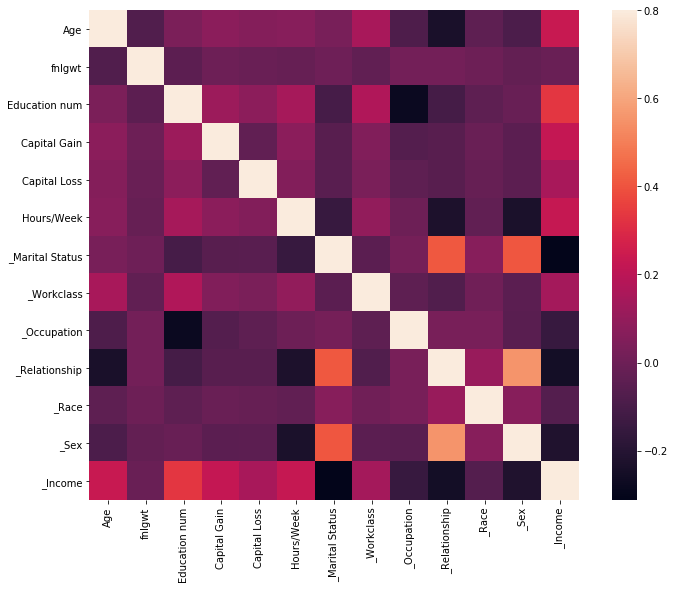

In [207]:
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sn.heatmap(corrmat, vmax=.8, square=True);

In [208]:
cols = ['Age','Education num','Capital Gain','Capital Loss','Hours/Week','_Workclass']
X_train = train_data[cols]
y_train = train_data._Income
X_test = test_data[cols]
# predict y_test?

In [209]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 6 columns):
Age              32561 non-null int64
Education num    32561 non-null int64
Capital Gain     32561 non-null int64
Capital Loss     32561 non-null int64
Hours/Week       32561 non-null int64
_Workclass       32561 non-null int64
dtypes: int64(6)
memory usage: 1.5 MB


In [210]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

In [211]:
# fit the model with data
logreg.fit(X_train,y_train)

/home/guillain/myproject/pycon/pyconenv/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [212]:
y_test=logreg.predict(X_test)

In [213]:
y_test

array([0, 0, 0, ..., 0, 1, 1])

In [214]:
test_data['Income predicted'] = y_test

In [215]:
test_data['Income predicted'].replace(0, ' <=50K',inplace=True)
test_data['Income predicted'].replace(1, ' >50K',inplace=True)

In [216]:
test_data.drop(['_Marital Status', '_Workclass', '_Occupation','_Relationship', '_Race', '_Sex', '_Income'],axis='columns',inplace=True)
test_data.head()

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income,Income predicted
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,<=50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K.,<=50K


In [217]:
test_data.to_csv('submission.csv',index=False)